In [91]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering


In [10]:
df = pd.read_csv("./SMAI - AQ2/CSV/TLBR_159.csv")

In [11]:
df.head()

,Unnamed: 0,Top-Left,Bottom-Right,Id
0,0,"[365, 291]","[783, 362]",0
1,1,"[802, 284]","[858, 342]",1
2,2,"[873, 291]","[931, 345]",2
3,3,"[1972, 280]","[2062, 335]",3
4,4,"[363, 455]","[464, 520]",4


In [12]:
img = cv2.imread('/Users/ashnadua/Desktop/smai-A2/SMAI - AQ2/images/159.jpg')

In [15]:
def visualize_bboxes(img):
    img_2 = img.copy()
    for index, rows in df.iterrows():
        top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
        bottom_right = (int(rows['Bottom-Right'].split(',')[[1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
#         print(top_left)
        cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)

    plt.imshow(img_2)

### Plotting the boxes

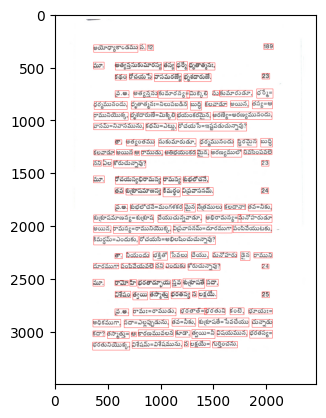

In [16]:
visualize_bboxes(img)

In [67]:
def calculate_center(top_left, bottom_right):
    x_center = (top_left[0] + bottom_right[0]) // 2
    y_center = (top_left[1] + bottom_right[1]) // 2
    return (x_center, y_center)

In [68]:
centers = []
for index, row in df.iterrows():
    top_left = (int(row['Top-Left'].split(',')[0][1:]), int(row['Top-Left'].split(',')[1][:-1]))
    bottom_right = (int(row['Bottom-Right'].split(',')[0][1:]), int(row['Bottom-Right'].split(',')[1][:-1]))
    box_center = calculate_center(top_left, bottom_right)
    centers.append(box_center)

### Plotting the box centers

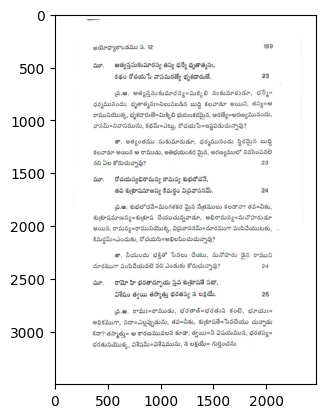

In [69]:
img_with_centers = img.copy()
for center in box_centers:
    cv2.circle(img_with_centers, center, 5, (0, 255, 0), -1) 

plt.imshow(img_with_centers)
plt.show()

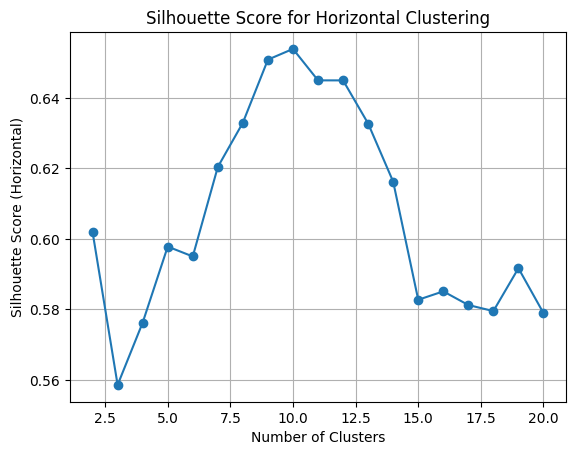

In [101]:
horizontal_linkage = linkage(center_df[['X']], method='ward', metric='euclidean')
horizontal_silhouette_scores = []

for k in range(2, 21):
    horizontal_labels = fcluster(horizontal_linkage, k, criterion='maxclust')
    silhouette_avg = silhouette_score(center_df[['X']], horizontal_labels)
    horizontal_silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 21), horizontal_silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (Horizontal)')
plt.title('Silhouette Score for Horizontal Clustering')
plt.grid(True)
plt.show()

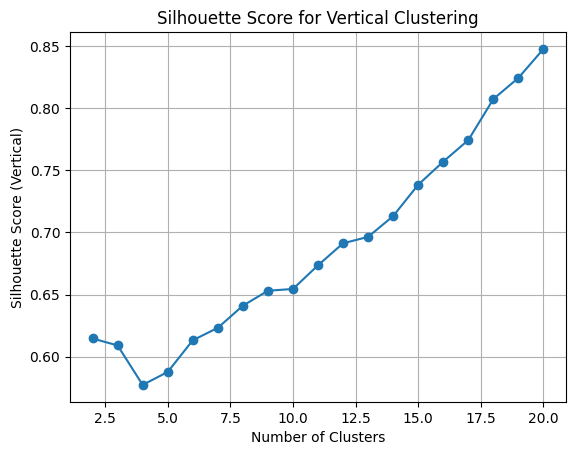

In [100]:
vertical_linkage = linkage(center_df[['Y']], method='ward', metric='euclidean')
vertical_silhouette_scores = []

for k in range(2, 21):
    vertical_labels = fcluster(vertical_linkage, k, criterion='maxclust')
    silhouette_avg = silhouette_score(center_df[['Y']], vertical_labels)
    vertical_silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 21), vertical_silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (Vertical)')
plt.title('Silhouette Score for Vertical Clustering')
plt.grid(True)
plt.show()

In [98]:
optimal_num_clusters_x = cluster_range[np.argmax(silhouette_scores_x)]
print("Optimal Clusters for Horizontal:", optimal_num_clusters_x)

Optimal Clusters for Horizontal: 10


In [99]:
optimal_num_clusters_y = cluster_range[np.argmax(silhouette_scores_y)]
print("Optimal Clusters for Vertical:", optimal_num_clusters_y)

Optimal Clusters for Vertical: 19
